# PISCES Output

Some simple visualization of PISCES output.

#Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Read PISCES output**](#Read-PISCES-output)
1. [**ORCA2 Grid (cpp_keys "Arctic")**](#ORCA2-Grid)
1. [**Variables on surface layer**](#Variables-on-surface-layer)
  2. [**Disolved Inorganic Carbon (DIC)**](#Disolved-Inorganic-Carbon-(DIC))
  2. [**Total Alkalinity (TALK)**](#Total-Alkalinity-(TALK))
  2. [**Nitrait**](#Nitrait)
  2. [**Ammonium**](#Ammonium)
  2. [**Phosphate**](#Phosphate)
  2. [**pH**](#pH)

# Import modules and tools

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from __future__ import division
from __future__ import print_function
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

In [4]:
__author__   = 'Yingkai Sha & CCAR Modeling Team'
__email__    = 'yingkai@eos.ubc.ca'

# Read PISCES output

In [5]:
ptrc_obj=glob.glob('_data/NEMO/ORCA2_LIM_PISCES/*1y*ptrc_T.nc')
print("found file: \n{}".format(ptrc_obj))
diad_obj=glob.glob('_data/NEMO/ORCA2_LIM_PISCES/*1y*diad_T.nc')
print("found file: \n{}".format(diad_obj))

found file: 
['_data/NEMO/ORCA2_LIM_PISCES\\ORCA2_1y_19700101_19701231_ptrc_T.nc']
found file: 
['_data/NEMO/ORCA2_LIM_PISCES\\ORCA2_1y_19700101_19701231_diad_T.nc']


In [6]:
PTRC=nc.Dataset(ptrc_obj[0])
DIAD=nc.Dataset(diad_obj[0])

In [7]:
depth=PTRC.variables['deptht'][:]
nav_lat=PTRC.variables['nav_lat'][:]
nav_lon=PTRC.variables['nav_lon'][:]

# ORCA2 Grid

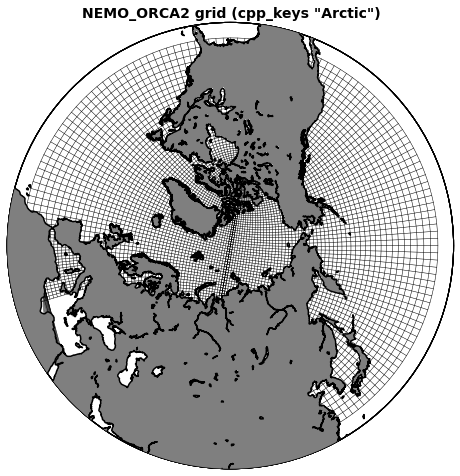

In [8]:
fig, ax = Nts.plot_NEMO_grid(nav_lon, nav_lat, 25, 'k', linewidth=0.5, location='north')
#
title='NEMO_ORCA2 grid (cpp_keys "Arctic")'
ax.set_title(title, fontsize=14, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

In [9]:
mask_obj=scipy.io.loadmat('_libs/ORCA2_Landmask_Arctic.mat')
ORCA2_mask=mask_obj['ORCA2_Landmask_Arctic']

In [12]:
mask_obj

{'ORCA2_Landmask_Arctic': array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  0., ...,  1.,  1.,  1.],
        [ 1.,  1.,  0., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Dec 18 23:21:59 2014',
 '__version__': '1.0',
 'nav_lat': array([[ 28.61286354,  28.61755371,  28.62233734, ...,  31.51135826,
          31.51135826,  31.51135826],
        [ 30.27186584,  30.28022766,  30.28875542, ...,  32.51136017,
          32.51136017,  32.51136017],
        [ 31.87070084,  31.88413811,  31.89783669, ...,  33.51136017,
          33.51136017,  33.51136017],
        ..., 
        [ 64.75574493,  65.60649872,  66.46028137, ...,  67.31674194,
          66.46028137,  65.60649872],
        [ 64.76981354,  65.62100983,  66.47523499, ...,  67.33219147,
          66.47

# Variables on surface layer

## Disolved Inorganic Carbon (DIC)

In [10]:
DIC=PTRC.variables['DIC'][:][0, :, :, :] # mmol/m3
DIC_Jan=DIC[0, :, :]
DIC_Jan_ma=np.ma.masked_where(ORCA2_mask==1, DIC_Jan)

In [11]:
print('DIC_Jan: {} ~ {}'.format(np.nanmin(DIC_Jan_ma), np.nanmax(DIC_Jan_ma)))

DIC_Jan: 1857.18664551 ~ 2468.88452148


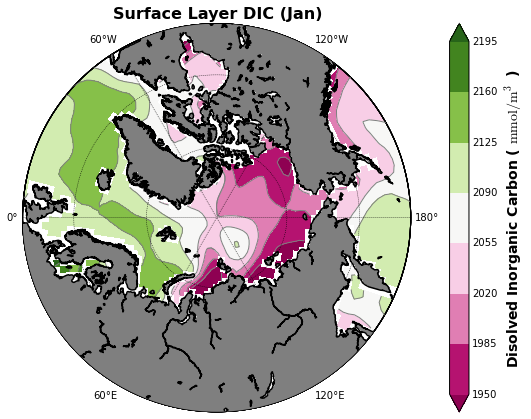

In [14]:
clevs=range(1950, 2200, 35)
var_name='Disolved Inorganic Carbon ( $\mathrm{mmol/m^3}$ )'
CMap=plt.cm.PiYG
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, DIC_Jan_ma, clevs, CMap, var_name, hit=1)
#
title='Surface Layer DIC (Jan)'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

## Total Alkalinity (TALK)

In [15]:
TALK=PTRC.variables['Alkalini'][:][0, :, :, :]
TALK_Jan=TALK[0, :, :]
TALK_Jan_ma=np.ma.masked_where(ORCA2_mask==1, TALK_Jan)
print('TALK_Jan: {} ~ {}'.format(np.nanmin(TALK_Jan_ma), np.nanmax(TALK_Jan_ma)))

TALK_Jan: 2147.99438477 ~ 2741.43481445


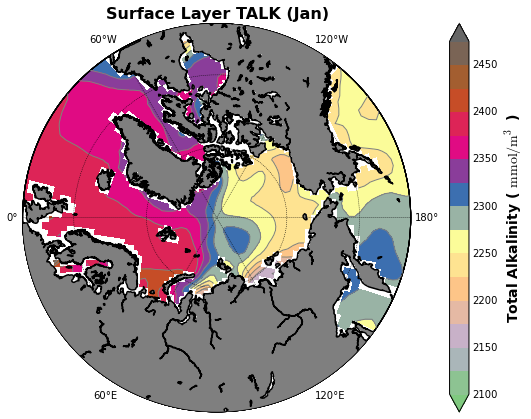

In [16]:
clevs=[2100, 2125, 2150, 2175, 2200, 2225, 2250, 2275, 2300, 2325, 2350, 2375, 2400, 2425, 2450, 2475]
var_name='Total Alkalinity ( $\mathrm{mmol/m^3}$ )'
CMap=plt.cm.Accent
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, TALK_Jan_ma, clevs, CMap, var_name, hit=1)
#
title='Surface Layer TALK (Jan)'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

## Nitrait

In [18]:
NO3=PTRC.variables['NO3'][:][0, :, :, :]
NO3_Jan=NO3[0, :, :]
NO3_Jan_ma=np.ma.masked_where(ORCA2_mask==1, NO3_Jan)
print('NO3_Jan: {} ~ {}'.format(np.nanmin(NO3_Jan_ma), np.nanmax(NO3_Jan_ma)))

NO3_Jan: 0.00169575610198 ~ 28.4741573334


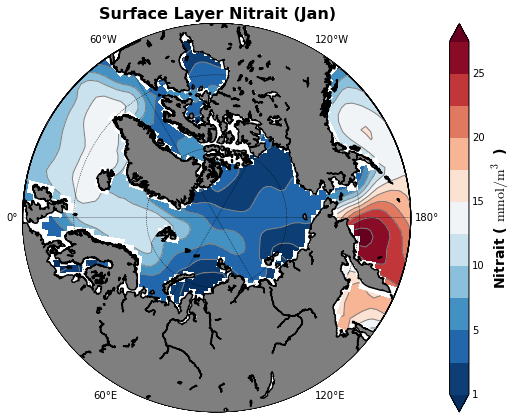

In [21]:
clevs=[1, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5]
var_name='Nitrait ( $\mathrm{mmol/m^3}$ )'
CMap=plt.cm.RdBu_r
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, NO3_Jan_ma, clevs, CMap, var_name, hit=1)
#
title='Surface Layer Nitrait (Jan)'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

## Ammonium

In [20]:
NH4=PTRC.variables['NH4'][:][0, :, :, :]
NH4_Jan=NH4[0, :, :]
NH4_Jan_ma=np.ma.masked_where(ORCA2_mask==1, NH4_Jan)
print('NH4_Jan: {} ~ {}'.format(np.nanmin(NH4_Jan_ma), np.nanmax(NH4_Jan_ma)))

NH4_Jan: 0.000372570153559 ~ 1.42627692223


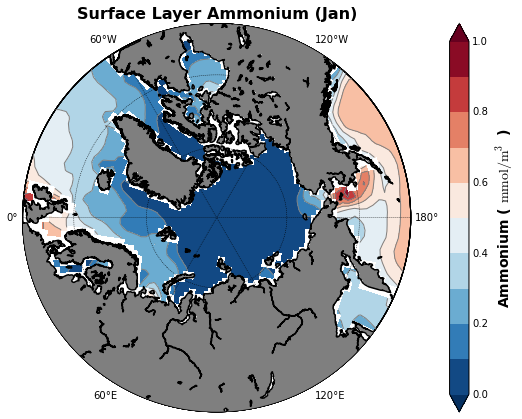

In [28]:
clevs=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
var_name='Ammonium ( $\mathrm{mmol/m^3}$ )'
CMap=plt.cm.RdBu_r
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, NH4_Jan_ma, clevs, CMap, var_name, hit=1)
#
title='Surface Layer Ammonium (Jan)'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

## Phosphate

In [25]:
PO4=PTRC.variables['PO4'][:][0, :, :, :]
PO4_Jan=PO4[0, :, :]
PO4_Jan_ma=np.ma.masked_where(ORCA2_mask==1, PO4_Jan)
print('PO4_Jan: {} ~ {}'.format(np.nanmin(PO4_Jan_ma), np.nanmax(PO4_Jan_ma)))

PO4_Jan: 0.0198967270553 ~ 2.51410841942


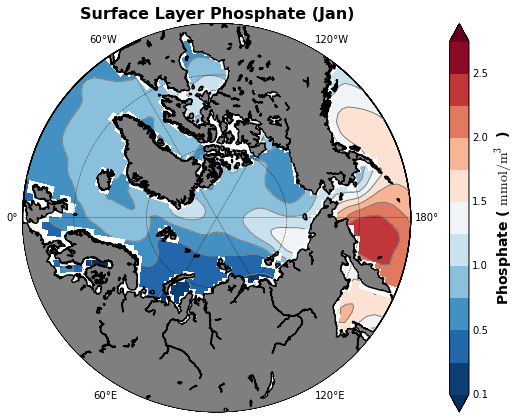

In [26]:
clevs=[0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75]
var_name='Phosphate ( $\mathrm{mmol/m^3}$ )'
CMap=plt.cm.RdBu_r
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, PO4_Jan_ma, clevs, CMap, var_name, hit=1)
#
title='Surface Layer Phosphate (Jan)'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

## pH

In [30]:
PH=DIAD.variables['PH'][:][0, :, :, :]
PH_Jan=PH[0, :, :]
PH_Jan_ma=np.ma.masked_where(ORCA2_mask==1, PH_Jan)
print('PH_Jan: {} ~ {}'.format(np.nanmin(PH_Jan_ma), np.nanmax(PH_Jan_ma)))

PH_Jan: 7.92044830322 ~ 8.87526798248


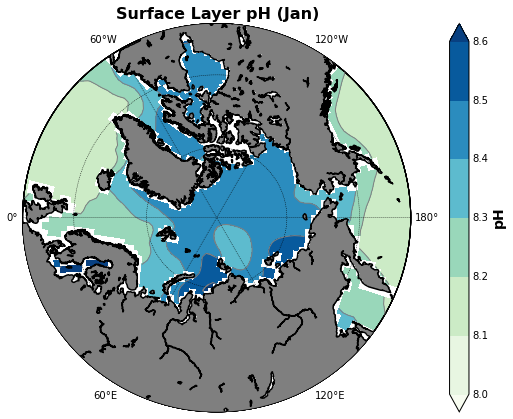

In [34]:
clevs=[8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6]
var_name='pH'
CMap=plt.cm.GnBu
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, PH_Jan_ma, clevs, CMap, var_name, hit=1)
#
title='Surface Layer pH (Jan)'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()